# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.991275e+01     6.449925e+00
 * time: 0.0044689178466796875
     1     2.846060e+01     5.224434e+00
 * time: 0.014208078384399414
     2     2.238919e+01     7.364858e+00
 * time: 0.03829598426818848
     3     1.387799e+01     2.517998e+00
 * time: 0.06645703315734863
     4     1.150081e+01     1.187988e+00
 * time: 0.08943700790405273
     5     1.063603e+01     9.129007e-01
 * time: 0.11071491241455078
     6     1.006393e+01     1.443338e+00
 * time: 0.12761402130126953
     7     9.619061e+00     6.727648e-01
 * time: 0.14442706108093262
     8     9.389111e+00     5.298738e-01
 * time: 0.1610870361328125
     9     9.285902e+00     5.259516e-01
 * time: 0.17812299728393555
    10     9.178344e+00     5.830328e-01
 * time: 0.19478988647460938
    11     9.110122e+00     3.189508e-01
 * time: 0.21134400367736816
    12     9.057257e+00     3.979678e-01
 * time: 0.2283010482788086
    13     9.006851e+00     4.608354e-01
 * time

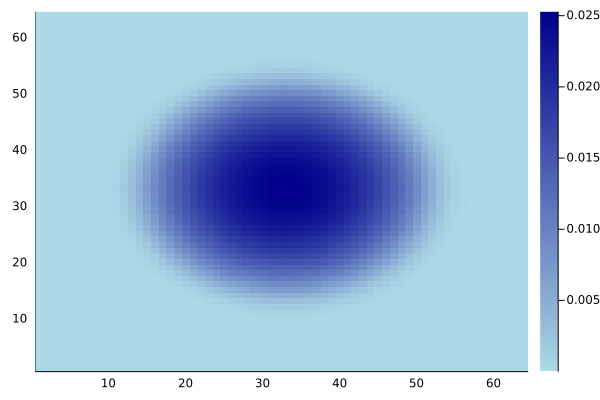

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)